# World Bank Group Finances

### Country Analysis: Zimbabwe

An exploration of the [Zimbabwean](https://financesapp.worldbank.org/en/countries/Zimbabwe/) statements.

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# The usual suspects ...
import numpy as np
import pandas as pd
import scipy as sc
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns

# And their accomplices
from sodapy import Socrata

# Plotting settings
sns.set(context='notebook', style='whitegrid', palette='deep', rc=None)

#### Getting the data

In [2]:
# 1. Authentication
client = Socrata(domain='finances.worldbank.org', 
                 app_token='myapptoken', 
                 username='myname@someplace.intheworld',
                 password='myrealpassword')

In [3]:
# 2. Connecting
results = client.get('8iaw-pcc6', limit=5000, where='country="Zimbabwe"')

In [4]:
# 3. To DataFrame
df = pd.DataFrame.from_records(results)

In [5]:
# Data size
print("Zimbabwe Data\nRows: {}\nColumns: {}".format(df.shape[0],df.shape[1]))

Zimbabwe Data
Rows: 22
Columns: 32


### Cleaning

In [6]:
# Data types
df.dtypes

agreement_signing_date         object
board_approval_date            object
borrower                       object
borrower_s_obligation          object
cancelled_amount               object
closed_date_most_recent_       object
country                        object
country_code                   object
disbursed_amount               object
due_3rd_party                  object
due_to_ibrd                    object
effective_date_most_recent_    object
end_of_period                  object
exchange_adjustment            object
first_repayment_date           object
guarantor                      object
guarantor_country_code         object
interest_rate                  object
last_disbursement_date         object
last_repayment_date            object
loan_number                    object
loan_status                    object
loan_type                      object
loans_held                     object
original_principal_amount      object
project_id                     object
project_name

All the columns are of the same type. We need to convert them to an appropriate type for our analysis.

In [7]:
# Convertion function
def value_converter(data, string, value_type):
    '''
    Converts data from one type to another.
    data: dataset to convert.
    string: keyword to use for searching 
                through columns to convert.
    value_type: data type to convert to,
                with the following options:
                    1. 'time'    - datetime
                    2. 'float'   - floating point
                    3. 'integer' - integers
    '''
    try:
        for i in zip(data.columns.str.contains(string), data.columns):
            if (i[0] == True and value_type.lower() == 'time'):
                data[i[1]] = pd.to_datetime(df[i[1]], format='%Y-%m-%d')
            if (i[0] == True and value_type.lower() == 'float'):
                data[i[1]] = data[i[1]].astype(np.float)
            if (i[0] == True and value_type.lower() == 'integer'):
                data[i[1]] = data[i[1]].astype(np.int)
    except ValueError as a: print(a)

In [8]:
# Changing dates
for i in ['date', 'period']:
    value_converter(data=df, string=i, value_type='time')

# Changing to floating point
for k in ['amount', 'due', 'rate', 'repaid', 'sold', 'loans_held', 'exchange_adjustment', 'borrower_s_obligation']:
    value_converter(data=df, string=k, value_type='float')

In [9]:
df.dtypes

agreement_signing_date         datetime64[ns]
board_approval_date            datetime64[ns]
borrower                               object
borrower_s_obligation                 float64
cancelled_amount                      float64
closed_date_most_recent_       datetime64[ns]
country                                object
country_code                           object
disbursed_amount                      float64
due_3rd_party                         float64
due_to_ibrd                           float64
effective_date_most_recent_    datetime64[ns]
end_of_period                  datetime64[ns]
exchange_adjustment                   float64
first_repayment_date           datetime64[ns]
guarantor                              object
guarantor_country_code                 object
interest_rate                         float64
last_disbursement_date         datetime64[ns]
last_repayment_date            datetime64[ns]
loan_number                            object
loan_status                       

#### Missing Values

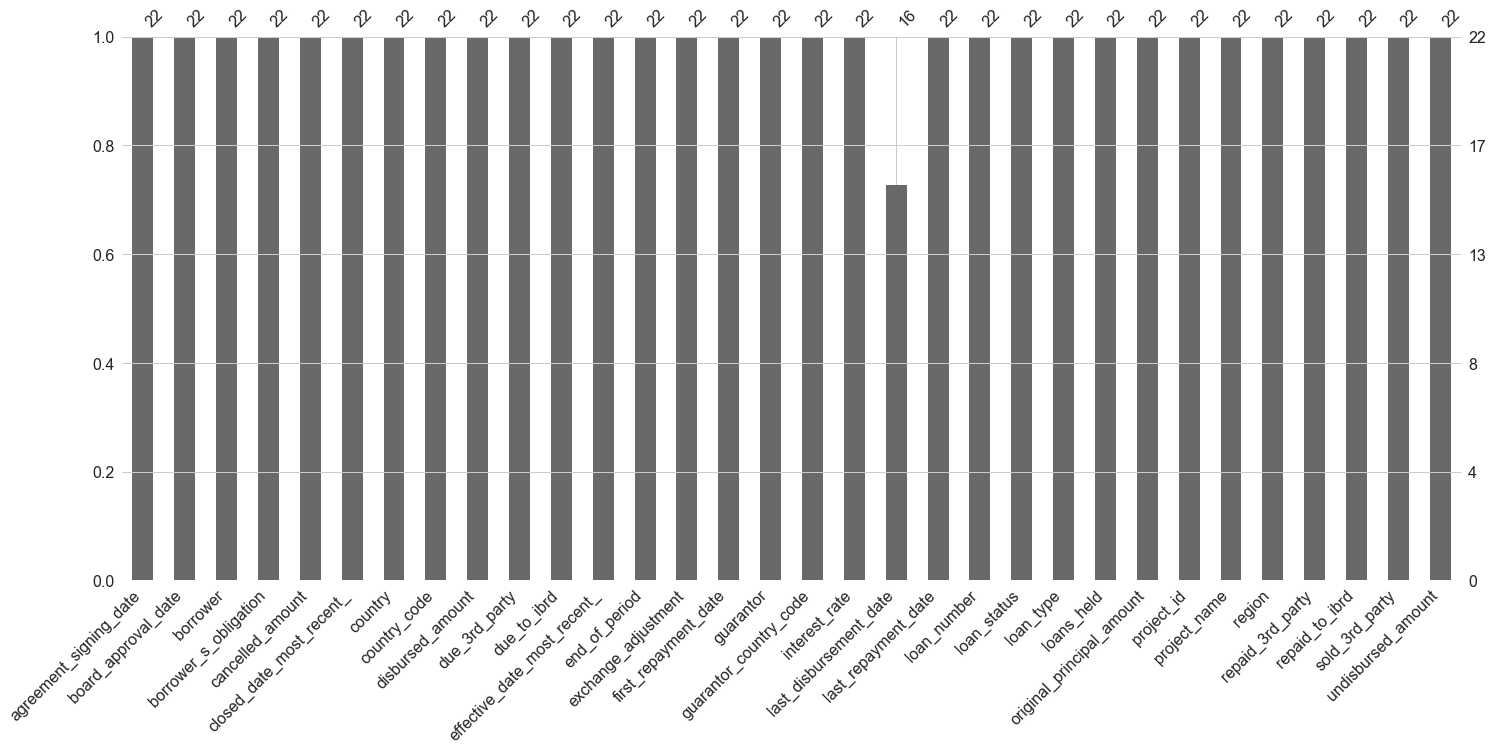

In [10]:
msn.bar(df)

There is only one column with missing values, and that is the `last_disbursement_date`, with 8 missing values.

#### Unique Values

In [11]:
# Letter case (for the sake of uniformity)
def word_case(data, font='Title'):
    '''
    Change the letter-case for columns containing strings.
    '''
    names = (i for i in data.columns)
    try:
        while True:
            column = names.__next__()
            if (data[column].dtype == 'O'):
                if (font.lower() == 'title'):
                    data[column] = data[column].str.title()
                elif (font.lower() == 'lower'):
                    data[column] = data[column].str.lower()
                elif (font.lower() == 'upper'):
                    data[column] = data[column].str.upper()
                else:
                    pass
    except StopIteration: print('Done.\n')
    except KeyError: print('Nothing to do.\n')

In [12]:
word_case(data=df)

Done.



In [13]:
# Unique value counts
def unique_value_counts(data):
    '''
    Prints the unique value counts for each column.
    '''
    cols = (x for x in data.columns)
    try:
        while True:
            field = cols.__next__()
            print('='*50, 
                  '\nColumn: "{}"\nCount:\t{}\n'.format(field, len(data[field].unique())),
                  '='*50, '\n')
    except StopIteration: print('Done.')
    except KeyError: print('Nothing to do.\n')

In [14]:
unique_value_counts(df)

Column: "agreement_signing_date"
Count:	21

Column: "board_approval_date"
Count:	22

Column: "borrower"
Count:	3

Column: "borrower_s_obligation"
Count:	20

Column: "cancelled_amount"
Count:	14

Column: "closed_date_most_recent_"
Count:	18

Column: "country"
Count:	1

Column: "country_code"
Count:	1

Column: "disbursed_amount"
Count:	22

Column: "due_3rd_party"
Count:	1

Column: "due_to_ibrd"
Count:	20

Column: "effective_date_most_recent_"
Count:	22

Column: "end_of_period"
Count:	1

Column: "exchange_adjustment"
Count:	20

Column: "first_repayment_date"
Count:	22

Column: "guarantor"
Count:	2

Column: "guarantor_country_code"
Count:	2

Column: "interest_rate"
Count:	8

Column: "last_disbursement_date"
Count:	17

Column: "last_repayment_date"
Count:	22

Column: "loan_number"
Count:	22

Column: "loan_status"
Count:	2

Column: "loan_type"
Count:	2

Column: "loans_held"
Count:	20

Column: "original_principal_amount"
Count:	21

Column: "project_id"
Count:	22

Column: "project_name"
Count:

In [15]:
# Unique value counts
def unique_values(data):
    '''
    Prints the unique values for each column.
    '''
    cols = (x for x in data.columns)
    try:
        while True:
            field = cols.__next__()
            print('='*75, 
                  '\n Column Name: ', field, 
                  '\n\n', data[field].unique(),
                  '\n',
                  '='*75,
                  '\n')
    except StopIteration: print('Done.')
    except KeyError: print('Nothing to do.\n')

In [16]:
unique_values(df)

 Column Name:  agreement_signing_date 

 ['1986-10-01T00:00:00.000000000' '1981-06-22T00:00:00.000000000'
 '1985-08-08T00:00:00.000000000' '1983-02-09T00:00:00.000000000'
 '1983-08-08T00:00:00.000000000' '1990-01-31T00:00:00.000000000'
 '1988-03-18T00:00:00.000000000' '1983-03-09T00:00:00.000000000'
 '1988-08-24T00:00:00.000000000' '1990-08-07T00:00:00.000000000'
 '1981-04-09T00:00:00.000000000' '1960-04-01T00:00:00.000000000'
 '1984-09-23T00:00:00.000000000' '1990-09-27T00:00:00.000000000'
 '1994-04-05T00:00:00.000000000' '1958-06-16T00:00:00.000000000'
 '1952-02-27T00:00:00.000000000' '1991-01-15T00:00:00.000000000'
 '1991-07-25T00:00:00.000000000' '1992-02-04T00:00:00.000000000'
 '1983-08-29T00:00:00.000000000'] 

 Column Name:  board_approval_date 

 ['1986-07-22T00:00:00.000000000' '1981-05-19T00:00:00.000000000'
 '1985-05-09T00:00:00.000000000' '1982-12-07T00:00:00.000000000'
 '1983-05-17T00:00:00.000000000' '1989-05-18T00:00:00.000000000'
 '1988-01-12T00:00:00.000000000' '1983-0

In [17]:
# Redundant columns
def remove_columns(data):
    '''
    To remove redundant columns, i.e., columns
    with single or no entries, or with more than
    50% of the data missing.
    '''
    # First, we identify the columns we want to remove:
    print('Initial shape of the dataset',
          '\nRows: {}\nColumns: {}\n'.format(data.shape[0], 
                                             data.shape[1]))
    removeColumn = list()
    for column in data.columns:
        # 1. Number of unique items the column contains:
        if (len(data[column].unique()) == 1):
            removeColumn.append(column)
        # 2. Number of missing values:
        elif (data[column].isnull().sum() > ((data.shape[0])/2)):
            removeColumn.append(column)
    if (len(removeColumn) > 0):
        for column in removeColumn:
            print('The following will be removed: {}\n'.format(column))
    else:
        print('Nothing to delete.\n')
    
    # Removing the columns:
    deleteColumn = (x for x in removeColumn)
    try:
        while True:
            del data[deleteColumn.__next__()]
    except StopIteration:
        print('Final shape of the dataset',
              '\nRows: {}\nColumns: {}'.format(data.shape[0], 
                                           data.shape[1]))

In [18]:
remove_columns(df)

Initial shape of the dataset 
Rows: 22
Columns: 32

The following will be removed: country

The following will be removed: country_code

The following will be removed: due_3rd_party

The following will be removed: end_of_period

The following will be removed: region

The following will be removed: undisbursed_amount

Final shape of the dataset 
Rows: 22
Columns: 26


### Exploration

In [19]:
# Summary statistics
df.describe()

,borrower_s_obligation,cancelled_amount,disbursed_amount,due_to_ibrd,exchange_adjustment,interest_rate,loans_held,original_principal_amount,repaid_3rd_party,repaid_to_ibrd,sold_3rd_party
count,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,22.000000,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01
mean,1.977571e+07,2.422592e+06,4.027286e+07,1.828019e+07,1.495518e+06,7.936136,1.828019e+07,4.269545e+07,1.287837e+06,2.070484e+07,1.287837e+06
std,2.964228e+07,4.244879e+06,3.313057e+07,2.736605e+07,2.681946e+06,1.927882,2.736605e+07,3.263499e+07,4.728098e+06,2.169203e+07,4.728098e+06
min,0.000000e+00,0.000000e+00,5.600000e+06,0.000000e+00,-1.961230e+05,1.970000,0.000000e+00,5.600000e+06,0.000000e+00,2.314000e+06,0.000000e+00
25%,1.624596e+06,0.000000e+00,1.573167e+07,1.321731e+06,1.014473e+04,8.290000,1.321731e+06,1.712500e+07,0.000000e+00,7.198081e+06,0.000000e+00
50%,8.641566e+06,2.699846e+05,3.190262e+07,8.771354e+06,3.145073e+05,8.440000,8.771354e+06,3.745000e+07,0.000000e+00,1.025396e+07,0.000000e+00
75%,2.091862e+07,2.854839e+06,4.844795e+07,2.021683e+07,1.281031e+06,8.440000,2.021683e+07,4.850000e+07,0.000000e+00,2.574940e+07,0.000000e+00
max,1.138095e+08,1.743975e+07,1.250000e+08,1.040975e+08,9.712035e+06,11.600000,1.040975e+08,1.250000e+08,2.204900e+07,9.099792e+07,2.204900e+07


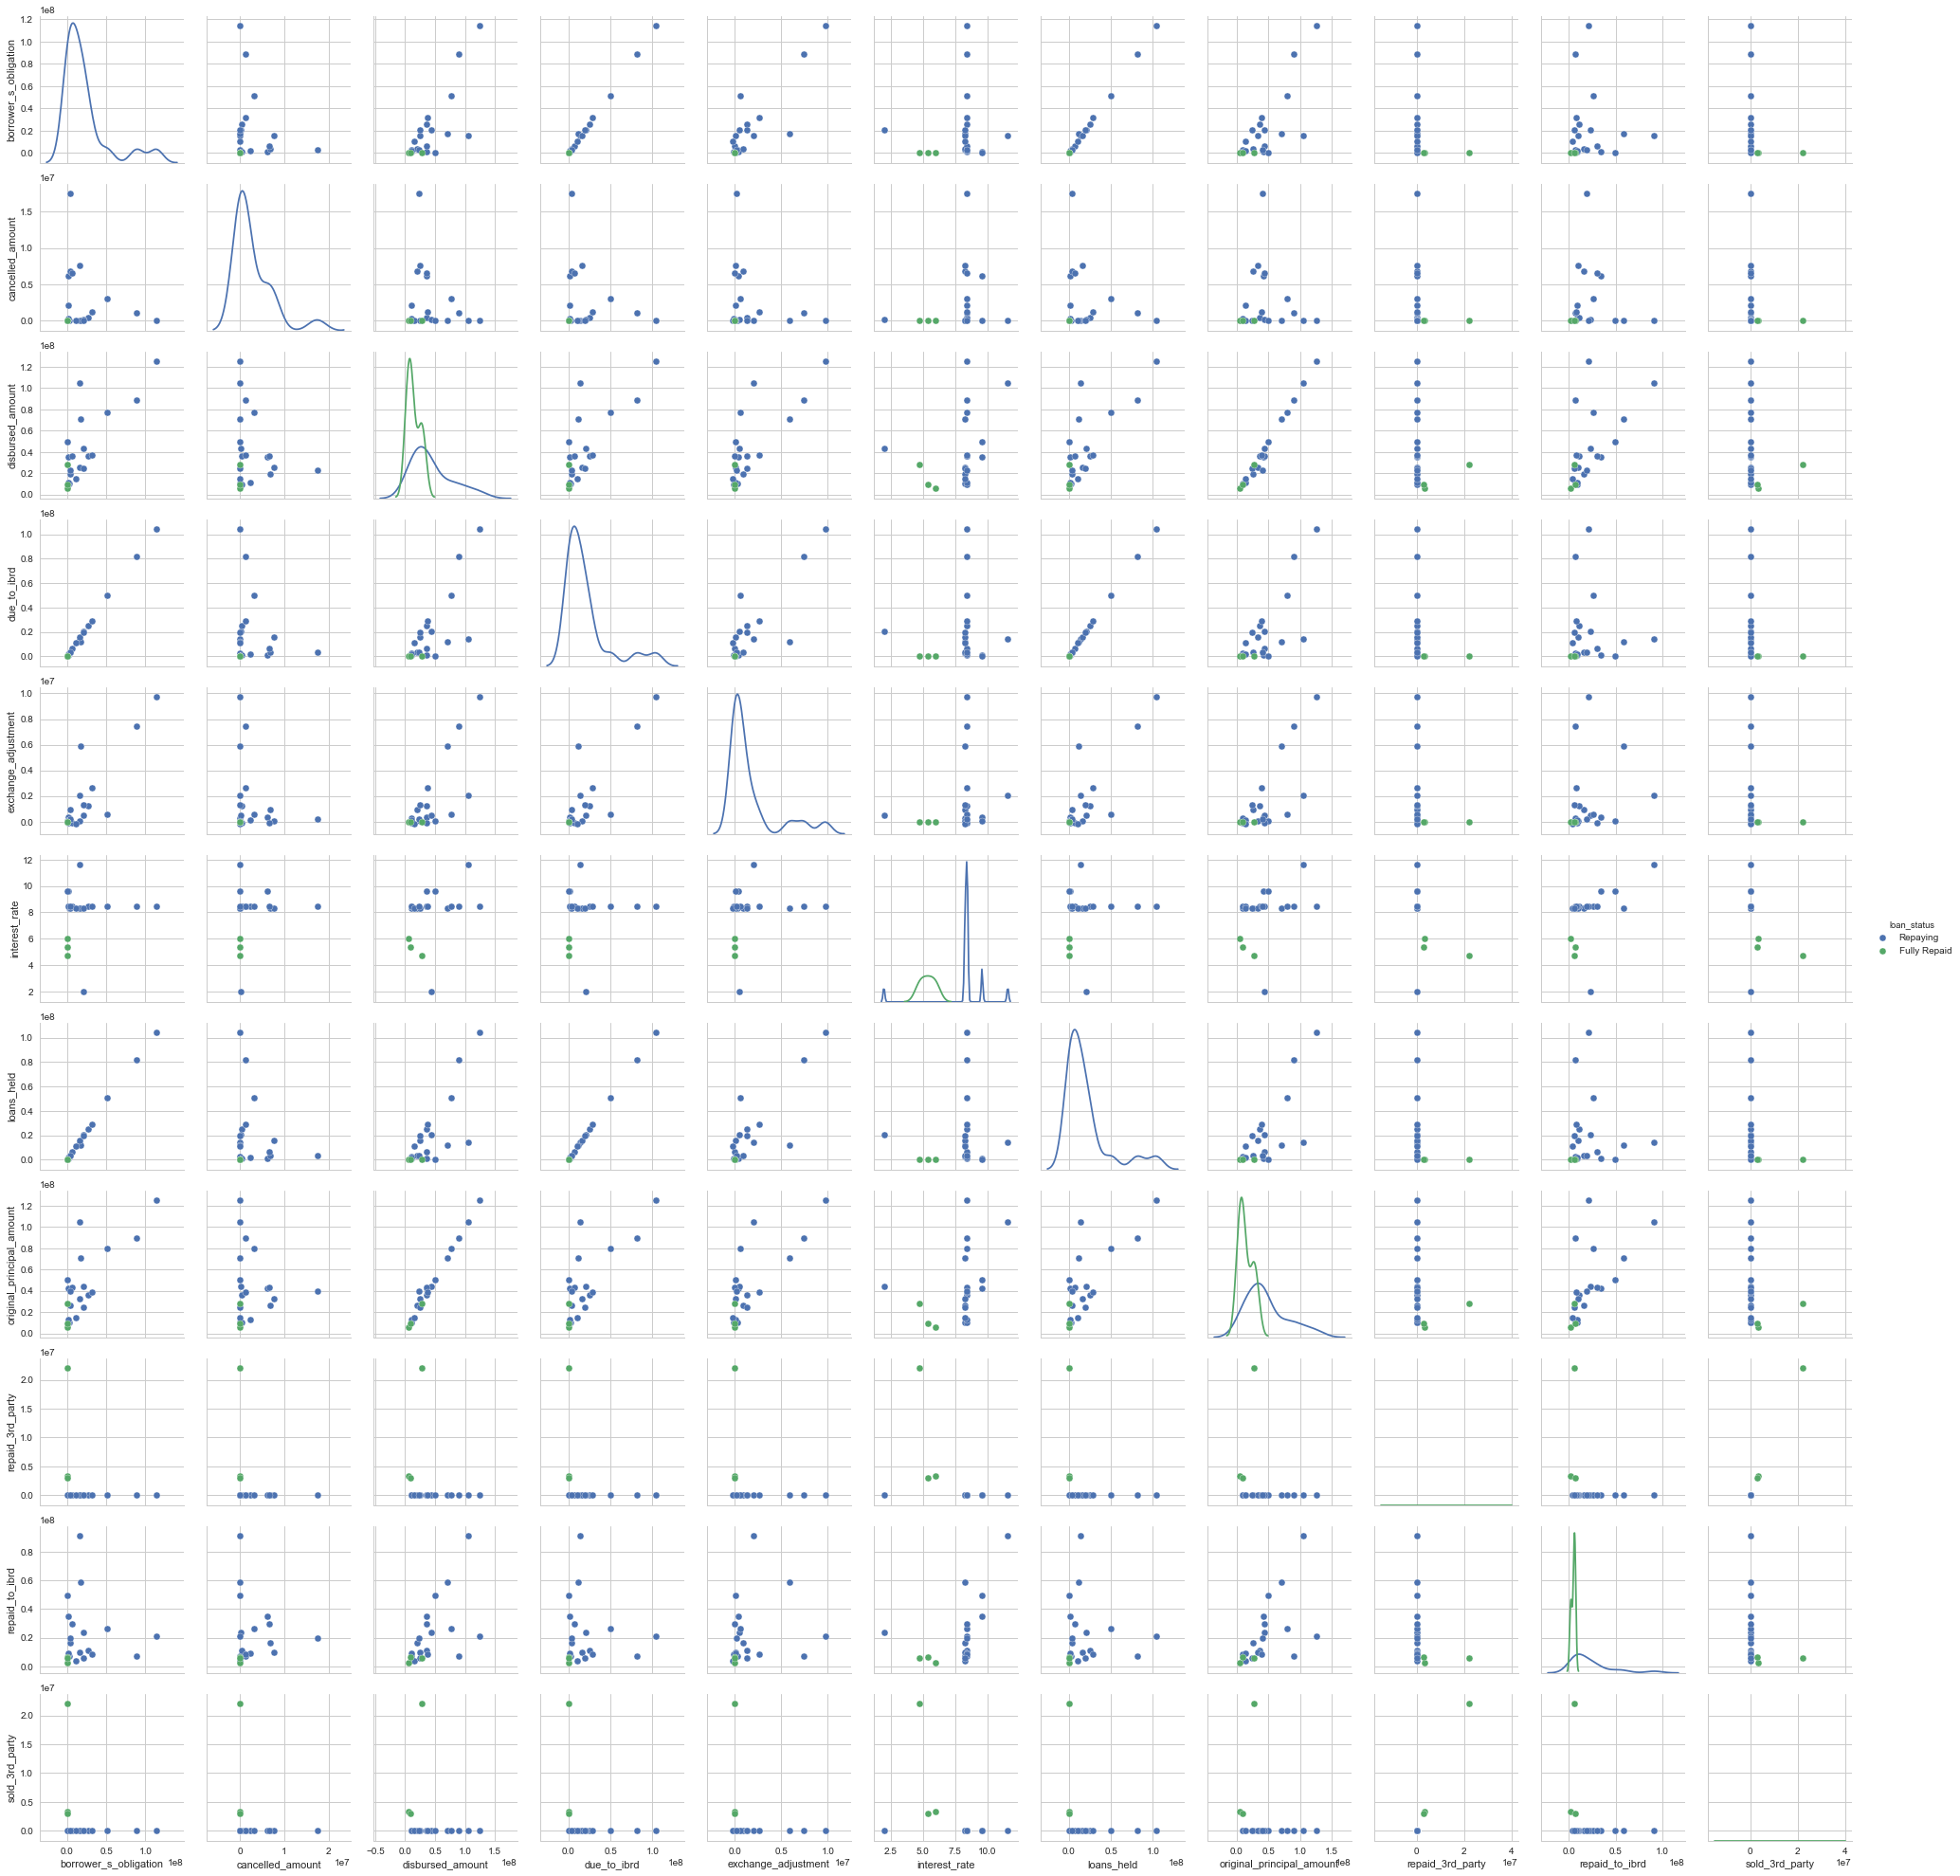

In [20]:
sns.pairplot(df, hue='loan_status', diag_kind='kde')

Text(24.7364,0.5,'Original Principal Amount')

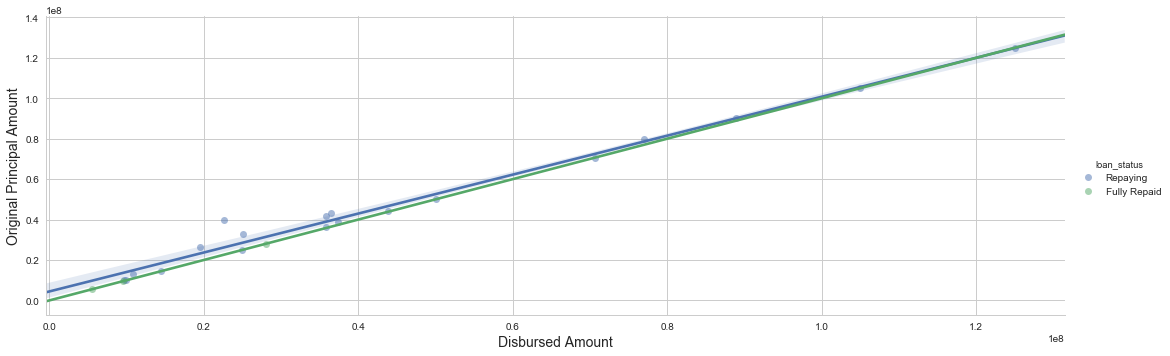

In [21]:
# Disbursed and original principal amounts
sns.lmplot(data=df, x='disbursed_amount', y='original_principal_amount', fit_reg=True, scatter_kws={'alpha':0.5}, hue='loan_status', aspect=3)
plt.xlabel('Disbursed Amount', fontsize=14)
plt.ylabel('Original Principal Amount', fontsize=14)

There is a strong correlation between the original principal amount of the loan and the amount that was actually disbursed. There is a slight difference in the loan status for smaller amounts disbursed compared to larger amounts - smaller amounts are more likely to be repaid in full than larger amounts where some loans are fully repaid and some aren't.

Text(24.9401,0.5,'Interest Rate')

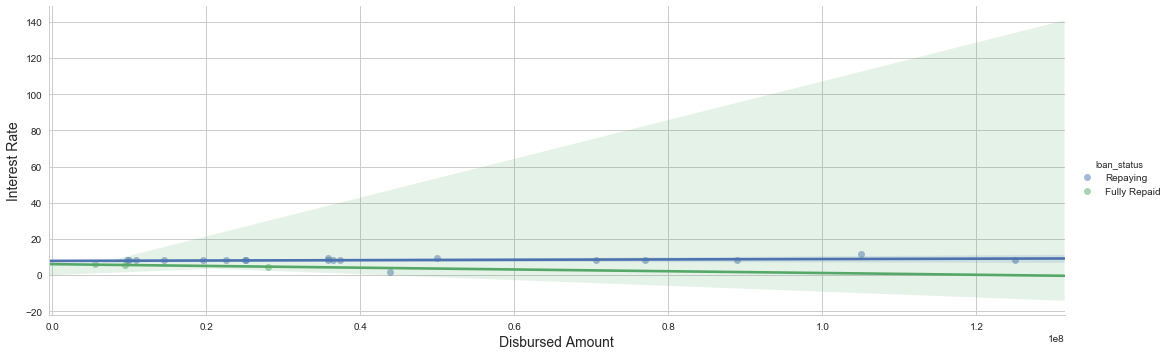

In [22]:
# Disbursed amount and interest rate
sns.lmplot(data=df, x='disbursed_amount', y='interest_rate', fit_reg=True, scatter_kws={'alpha':0.5}, hue='loan_status', aspect=3)
plt.xlabel('Disbursed Amount', fontsize=14)
plt.ylabel('Interest Rate', fontsize=14)

There is a slightly negative to no correlation between the interest rate and the amount disbursed. The two don't appear to be related on loans being repayed by have a slightly negative relationship for loans that have been fully paid, i.e., for larger amounts disbursed. This means, for larger loans that are fully repaid, there is a negative effect on the interest rates being payed on other larger loans that are not fully repaid.

<br\>
***Is the interest rate significantly different from $0$?***
<br\>
We'll try to find out if the interest rate is significantly different from zero. This will tell us if the relationship we are seeing on correlation is worth considering (level of significance).

In [23]:
# Significance of the interest rate
test = sc.stats.ttest_1samp(df.interest_rate, 0.0)
print('='*55)
print('Interest Rate\nH-Null: \t\tThe mean is equal to zero.\nH-Alt: \t\t\tThe mean is not equal to zero.')
print('Test Statistic: \t{0}\nAlpha (p-value): \t{1}'.format(test[0], test[1]))
if (test[1] <= 0.00000001):
    print('Conclusion: \t\tMean is not equal to zero.')
else:
    print('Conclusion: \t\tMean is equal to zero.')
print('='*55, '\n')

Interest Rate
H-Null: 		The mean is equal to zero.
H-Alt: 			The mean is not equal to zero.
Test Statistic: 	19.30812262410725
Alpha (p-value): 	7.574781524598468e-15
Conclusion: 		Mean is not equal to zero.



Conclusion: the interest rate is worth considering.

### Time Series

In [24]:
# Time series creator
def create_time_series(data, date, variable):
    '''
    Creates a series object with the date 
    as the index.
    '''
    # Initialization
    initial = data[[date, variable]]
    # Sorting the dates in ascending order
    initial[date] = sorted(initial[date])
    # Time series
    time_series = initial.set_index(date)[variable]
    return time_series

In [25]:
# Time series plotting function
def plot_series(series, title=None, ylabel=None, color='blue'):
    plt.figure(figsize=(22, 8))
    plt.plot(series, color=color)
    plt.title(title, fontsize=24)
    plt.xticks(fontsize=12)
    plt.ylabel(ylabel, fontsize=16)
    plt.yticks(fontsize=12)

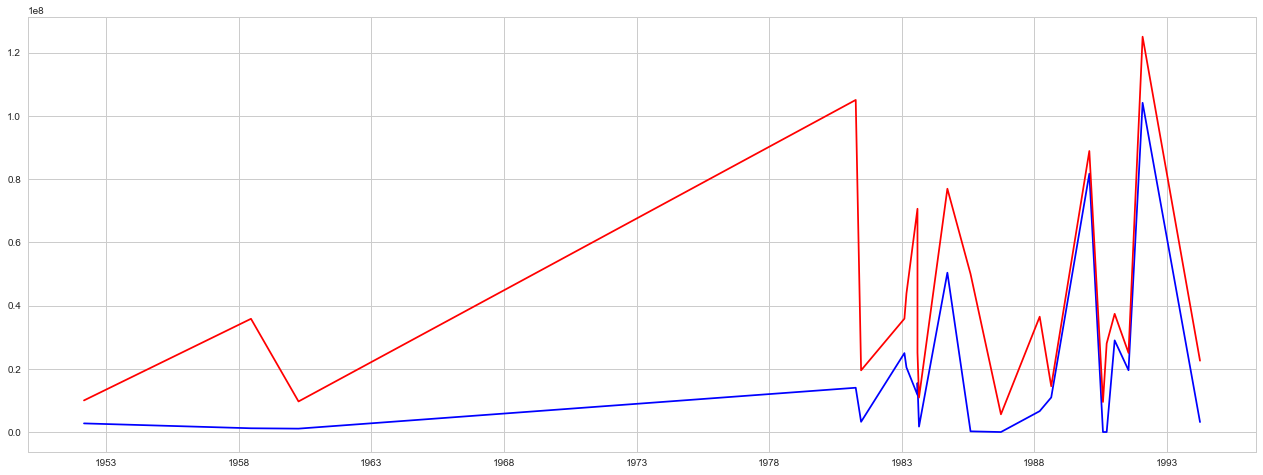

In [26]:
# Disbursed amount
disbursed = create_time_series(df, date='agreement_signing_date', variable='disbursed_amount')

# Due to ibrd
due = create_time_series(df, date='agreement_signing_date', variable='due_to_ibrd')

# Plotting
plt.figure(figsize=(22, 8))
plt.plot(due, color='blue')
plt.plot(disbursed, color='red')

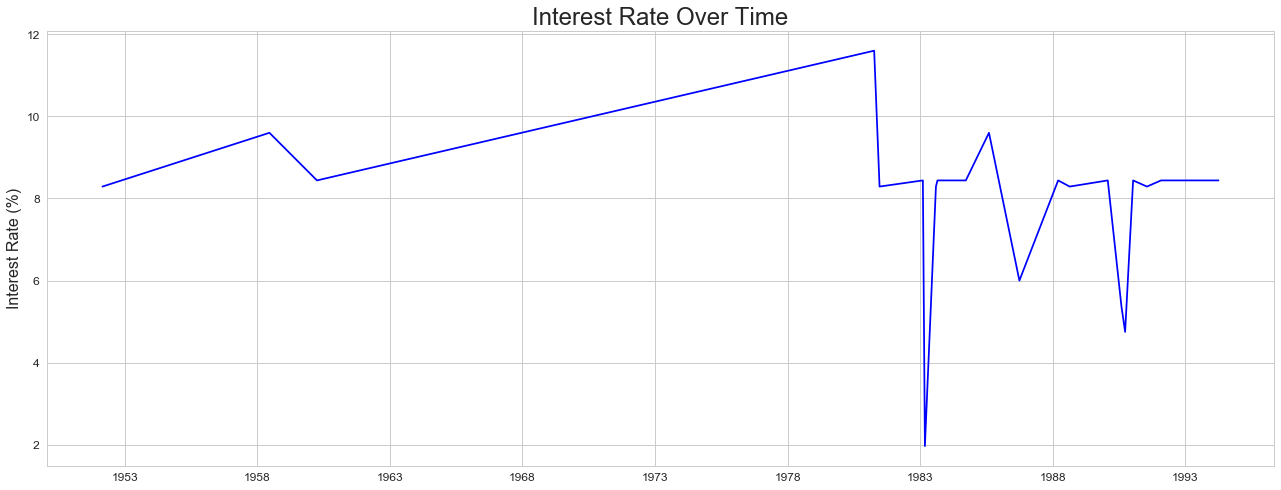

In [27]:
# Interest rate
interest = create_time_series(df, date='agreement_signing_date', variable='interest_rate')

# Plotting
plot_series(interest, title='Interest Rate Over Time', ylabel='Interest Rate (%)')

The interest rate has remained fairly constant over the years, with dips in 1983, 1987 and 1990, and peaks in 1958 and 1980. There was a long stretching increase in interest rate from 1960 to 1980, followed by a sharp decline at the end of the period.

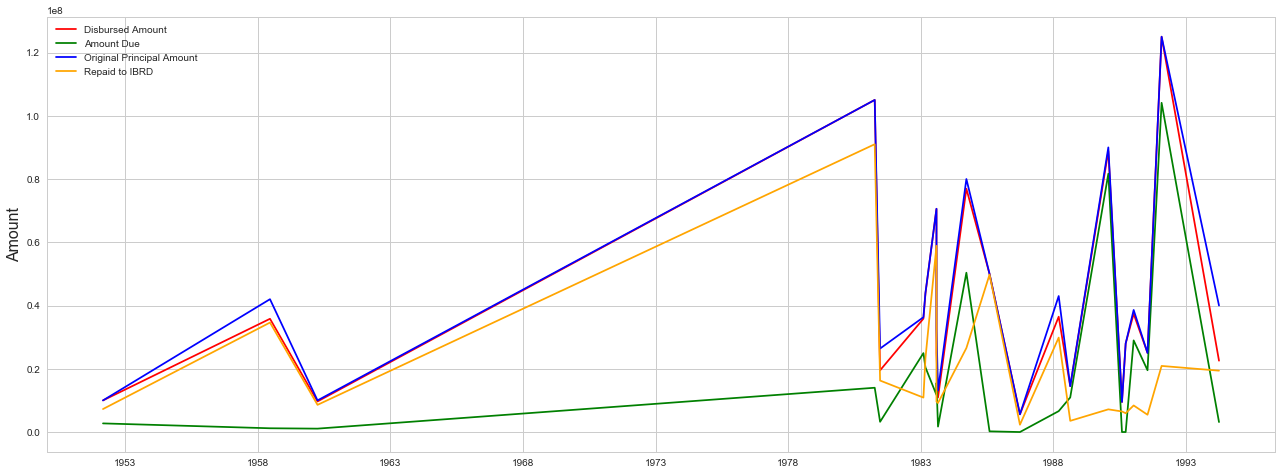

In [28]:
# Original amount
original = create_time_series(df, date='agreement_signing_date', variable='original_principal_amount')

# Repaid
repaid = create_time_series(df, date='agreement_signing_date', variable='repaid_to_ibrd')

# Amounts
plt.figure(figsize=(22, 8))
plt.plot(disbursed, color='red')
plt.plot(due, color='green')
plt.plot(original, color='blue')
plt.plot(repaid, color='orange')
plt.ylabel('Amount', fontsize=16)
plt.legend(['Disbursed Amount', 'Amount Due', 'Original Principal Amount', 'Repaid to IBRD'])

It appears that Zimbabwe had a more activity in obtaining funding from the World Bank after it attained independence in 1980. 
<br><br/>
The original principal amounts increased, while repayment amounts decreased over time. The disbursed amounts follow closely the original principal amounts.
<br><br/>
***Who was borrowing from the World Bank?***

In [29]:
# Borrowers
df.borrower.value_counts()

Ministry Of Finance & Eco Development     16
H. M. Treasury                             3
Zimbabwe Electricity Supply Commission     3
Name: borrower, dtype: int64

The Ministry of Finance & Economic Development was borrowing the most, with 16 different occurances. The Treasury and ZESC, the commission that established the electricity supply body now known as Zimbabwe Electricity Supply Authority (ZESA), were also borrowing from the World Bank.
<br><br/>
***How much did they borrow?***

In [30]:
# Amounts borrowed
df.groupby(['borrower'])['original_principal_amount'].sum()

borrower
H. M. Treasury                             43100000.0
Ministry Of Finance & Eco Development     657200000.0
Zimbabwe Electricity Supply Commission    239000000.0
Name: original_principal_amount, dtype: float64

The Ministry of Finance & Economic Development borrowed the most, with a total amount of $\$657,200,000.00$, followed by ZESC with $\$239,000,000.00$, and the Treasury with $\$43,100,000.00$.
<br><br/>
***What were they borrowing for?***

In [31]:
# Purpose
df.groupby(['borrower', 'project_name'])['borrower'].count()

borrower                                project_name                 
H. M. Treasury                          Agricultural Develop             1
                                        Power                            1
                                        Railway                          1
Ministry Of Finance & Eco Development   Agri.Crd. & Export P             1
                                        Ext&Res.Ifad                     1
                                        Family Health                    1
                                        Family Hlth.Ii                   1
                                        Highways I                       1
                                        Highways Ii                      1
                                        Manu.Sect.Export Pro             1
                                        Manufac.Rehab                    1
                                        Railway Develop.                 1
                              

*** How much did they borrow for each project?***

In [32]:
# Project loan amount
df.groupby(['borrower', 'project_name'])['original_principal_amount'].sum()

borrower                                project_name                 
H. M. Treasury                          Agricultural Develop               5600000.0
                                        Power                             28000000.0
                                        Railway                            9500000.0
Ministry Of Finance & Eco Development   Agri.Crd. & Export P              36300000.0
                                        Ext&Res.Ifad                      13100000.0
                                        Family Health                     10000000.0
                                        Family Hlth.Ii                    25000000.0
                                        Highways I                        26400000.0
                                        Highways Ii                       32700000.0
                                        Manu.Sect.Export Pro              70600000.0
                                        Manufac.Rehab                     500000

***What type of loans did the borrowers take?***

In [33]:
# Loan types
df.groupby(['borrower', 'loan_type'])['borrower'].count()

borrower                                loan_type
H. M. Treasury                          Non Pool      3
Ministry Of Finance & Eco Development   Pool Loan    16
Zimbabwe Electricity Supply Commission  Pool Loan     3
Name: borrower, dtype: int64

The Treasury had only non-pool loans, while the Ministry of Finance & Economic Development and ZESC had [pool loans](https://www.investopedia.com/terms/m/mortgage_pool.asp).

In [34]:
# Loan type and project loan amount
df.groupby(['borrower', 'project_name', 'loan_type', 'guarantor'])['original_principal_amount'].sum()

borrower                                project_name                   loan_type  guarantor     
H. M. Treasury                          Agricultural Develop           Non Pool   United Kingdom      5600000.0
                                        Power                          Non Pool   United Kingdom     28000000.0
                                        Railway                        Non Pool   United Kingdom      9500000.0
Ministry Of Finance & Eco Development   Agri.Crd. & Export P           Pool Loan  Zimbabwe           36300000.0
                                        Ext&Res.Ifad                   Pool Loan  Zimbabwe           13100000.0
                                        Family Health                  Pool Loan  Zimbabwe           10000000.0
                                        Family Hlth.Ii                 Pool Loan  Zimbabwe           25000000.0
                                        Highways I                     Pool Loan  Zimbabwe           26400000.0
       

In [35]:
# Loan type and project loan amount
df.groupby(['borrower', 'project_name', 'loan_type', 'guarantor'])['original_principal_amount'].describe().fillna(0)

count  \
borrower                               project_name                  loan_type guarantor               
H. M. Treasury                         Agricultural Develop          Non Pool  United Kingdom    1.0   
                                       Power                         Non Pool  United Kingdom    1.0   
                                       Railway                       Non Pool  United Kingdom    1.0   
Ministry Of Finance & Eco Development  Agri.Crd. & Export P          Pool Loan Zimbabwe          1.0   
                                       Ext&Res.Ifad                  Pool Loan Zimbabwe          1.0   
                                       Family Health                 Pool Loan Zimbabwe          1.0   
                                       Family Hlth.Ii                Pool Loan Zimbabwe          1.0   
                                       Highways I                    Pool Loan Zimbabwe          1.0   
                                       Highways Ii                   Pool Loan Zimbabwe          1.0   
                                       Manu.Sect.Export Pro          Pool Loan Zimbabwe          1.0   
                                       Manufac.Rehab                 Pool Loan Zimbabwe          1.0   
                                       Railway Develop.              Pool Loan Zimbabwe          1.0   
                                       Railways Ii                   Pool Loan Zimbabwe          1.0   
                                       Sap                           Pool Loan Zimbabwe          1.0   
                                       Sse I                         Pool Loan Zimbabwe          1.0   
                                       Transp.Rehab.                 Pool Loan Zimbabwe          1.0   
                                       Urban I                       Pool Loan Zimbabwe          1.0   
                                       Urban Ii                      Pool Loan Zimbabwe          1.0   
                                       Zimbabwe:Forest Resource Mgt& Pool Loan Zimbabwe          1.0   
Zimbabwe Electricity Supply Commission Power I                       Pool Loan Zimbabwe          1.0   
                                       Power Ii                      Pool Loan Zimbabwe          1.0   
                                       Power Iii                     Pool Loan Zimbabwe          1.0   

                                                                                                      mean  \
borrower                               project_name                  loan_type guarantor                     
H. M. Treasury                         Agricultural Develop          Non Pool  United Kingdom    5600000.0   
                                       Power                         Non Pool  United Kingdom   28000000.0   
                                       Railway                       Non Pool  United Kingdom    9500000.0   
Ministry Of Finance & Eco Development  Agri.Crd. & Export P          Pool Loan Zimbabwe         36300000.0   
                                       Ext&Res.Ifad                  Pool Loan Zimbabwe         13100000.0   
                                       Family Health                 Pool Loan Zimbabwe         10000000.0   
                                       Family Hlth.Ii                Pool Loan Zimbabwe         25000000.0   
                                       Highways I                    Pool Loan Zimbabwe         26400000.0   
                                       Highways Ii                   Pool Loan Zimbabwe         32700000.0   
                                       Manu.Sect.Export Pro          Pool Loan Zimbabwe         70600000.0   
                                       Manufac.Rehab                 Pool Loan Zimbabwe         50000000.0   
                                       Railway Develop.              Pool Loan Zimbabwe         40000000.0   
                                       Railways Ii        